<a href="https://colab.research.google.com/github/JNailantei/Mammal-Classification/blob/main/Animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
animals_df = pd.read_csv("animals.csv")

In [ ]:
animals_df.head()

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
X = animals_df.drop(columns=['Class','Sr'])
y = animals_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         1

    accuracy                           0.89        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.89      0.89      0.89        18



In [ ]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# Get unique class names from the target variable
unique_classes = sorted(y.unique())
class_names = [str(cls) for cls in unique_classes]


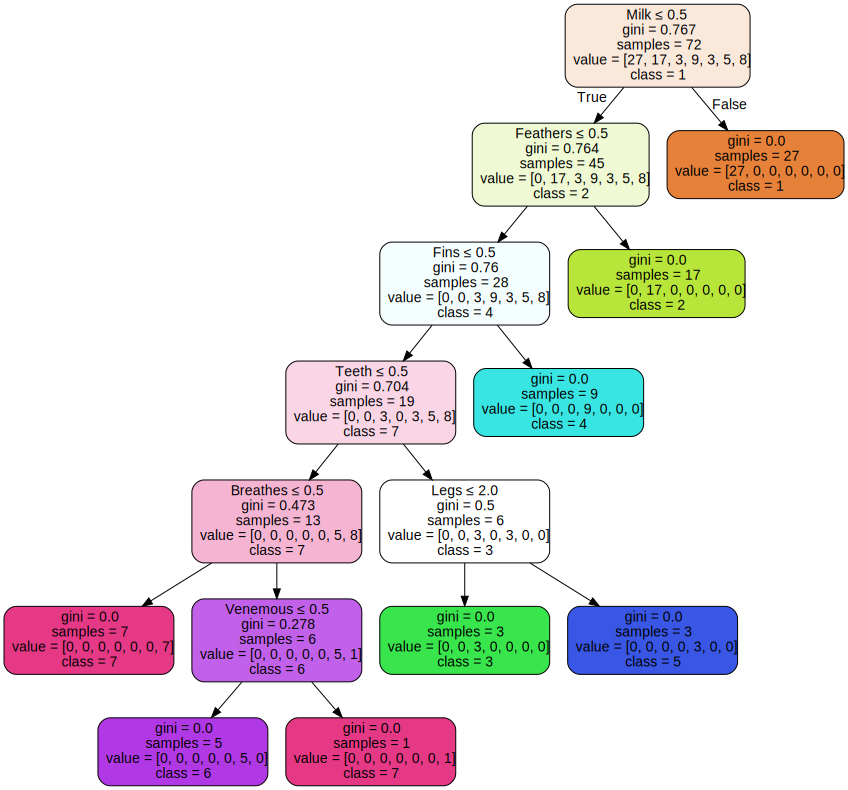

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the tree as a DOT file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("animal_tree")  # Save the tree as a file
graph  # Display the tree
